In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
df.isnull()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      False    False          False      False           False   
1      False    False          False      False           False   
2      False    False          False      False           False   
3      False    False          False      False           False   
4      False    False          False      False           False   
...      ...      ...            ...        ...             ...   
9995   False    False          False      False           False   
9996   False    False          False      False           False   
9997   False    False          False      False           False   
9998   False    False          False      False           False   
9999   False    False          False      False           False   

      EstimatedSalary  Exited  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
9995            False   False  
9996            False   False  
9997            False   False  
9998            False   False  
9999            False   False  

[10000 rows x 14 columns]

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [10]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [11]:
def visualization (x,y,xlabel):
 plt.figure(figsize=(10,5))
 plt.hist([x,y], color=['red','green'], label=['exit', 'not_exit'])
 plt.xlabel(xlabel,fontsize=20)
 plt.ylabel("No. of customers", fontsize = 20)
 plt.legend()

In [12]:
df_churn_exited = df [df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

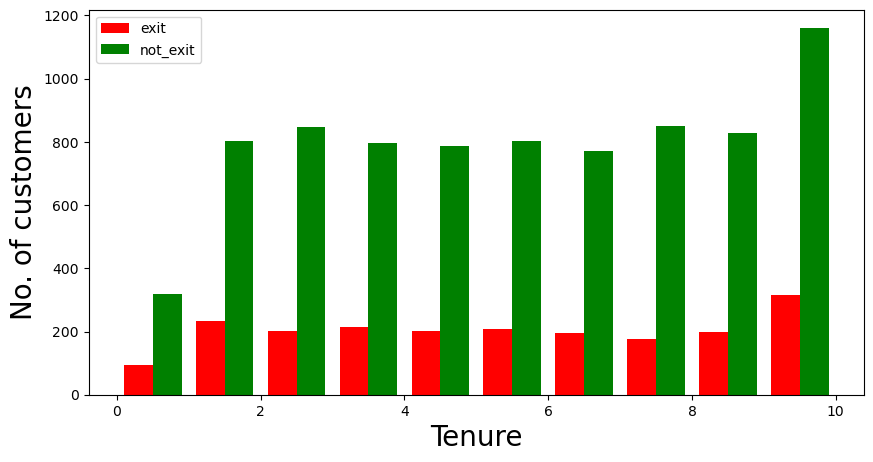

In [13]:
visualization(df_churn_exited,df_churn_not_exited,"Tenure")

In [14]:
df_churn_exited = df [df['Exited']==1]['Age']
df_churn_not_exited = df[df['Exited']==0]['Age']

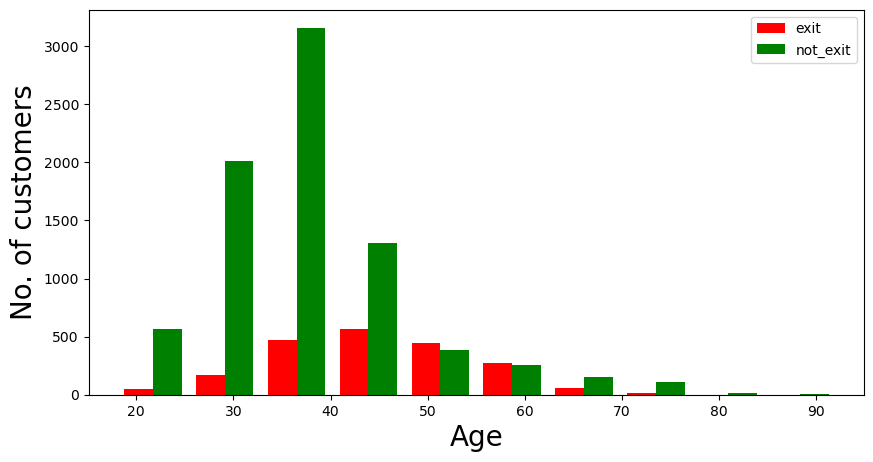

In [15]:
visualization(df_churn_exited,df_churn_not_exited,"Age")

In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
x = df[['CreditScore','Gender','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
states = pd.get_dummies(df['Geography'],drop_first= True)
gender = pd.get_dummies(df['Gender'],drop_first= True)

In [22]:
df = pd.concat([df,gender,states], axis=1)

In [23]:
df.head()


CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited   Male  Germany  Spain  \
0          1               1        101348.88       1  False    False  False   
1          0               1        112542.58       0  False    False   True   
2          1               0        113931.57       1  False    False  False   
3          0               0         93826.63       0  False    False  False   
4          1               1         79084.10       0  False    False   True   

    Male  Germany  Spain  
0  False    False  False  
1  False    False   True  
2  False    False  False  
3  False    False  False  
4  False    False   True

In [24]:
x = df[['CreditScore','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [25]:
y = df['Exited']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.25)

In [27]:
x.shape

(10000, 8)

In [28]:
x_test.shape

(2500, 8)

In [29]:
x_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2967          579   39       5  117833.30              3          0   
700           750   32       5       0.00              2          1   
3481          729   34       9   53299.96              2          1   
1621          689   38       5   75075.14              1          1   
800           605   52       7       0.00              2          1   
...           ...  ...     ...        ...            ...        ...   
9225          594   32       4  120074.97              2          1   
4859          794   22       4  114440.24              1          1   
3264          738   35       5  161274.05              2          1   
9845          590   38       9       0.00              2          1   
2732          623   48       1  108076.33              1          1   

      IsActiveMember  EstimatedSalary  
2967               0          5831.00  
700                0         95611.47  
3481               1         42855.97  
1621               1          8651.92  
800                1        173952.50  
...              ...              ...  
9225               1        162961.79  
4859               1        107753.07  
3264               0        181429.87  
9845               1        148750.16  
2732               0        118855.26  

[7500 rows x 8 columns]

In [30]:
x_test.shape


(2500, 8)

In [31]:
x_train.shape

(7500, 8)

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),
 random_state =0,
 max_iter=100, activation='relu')

In [34]:
ann.fit(x_train,y_train)

D:\programs\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [35]:
y_pred =ann.predict(x_test)

In [36]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
import sklearn


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score

In [39]:
y_test.value_counts()


Exited
0    1991
1     509
Name: count, dtype: int64

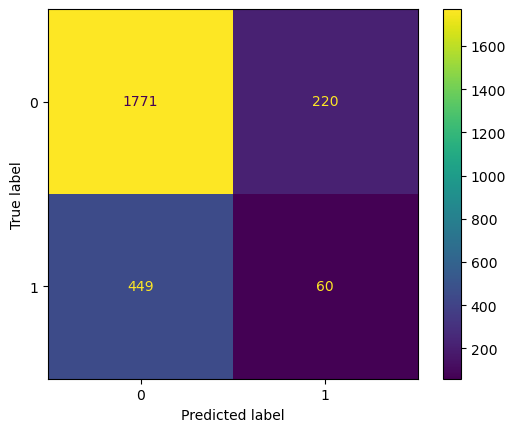

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [41]:
accuracy_score(y_test,y_pred)


0.7324

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1991
           1       0.21      0.12      0.15       509

    accuracy                           0.73      2500
   macro avg       0.51      0.50      0.50      2500
weighted avg       0.68      0.73      0.70      2500

